In [1]:
from DDPG import ddpg, ddpg_test
import tensorflow as tf
from utils import test_utils

Using Tensorflow  1.5.0


In [2]:
ddpg_test.ddpg_test()

[<tf.Variable 'Actor/network_kernel:0' shape=(128, 9) dtype=float32_ref>,
 <tf.Variable 'Actor/network_bias:0' shape=(9,) dtype=float32_ref>,
 <tf.Variable 'Actor/BatchNorm/beta:0' shape=(128,) dtype=float32_ref>]

[<tf.Variable 'ActorTarget/network_kernel:0' shape=(128, 9) dtype=float32_ref>,
 <tf.Variable 'ActorTarget/network_bias:0' shape=(9,) dtype=float32_ref>,
 <tf.Variable 'ActorTarget/BatchNorm/beta:0' shape=(128,) dtype=float32_ref>]

[<tf.Variable 'Critic/inputs_network_kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'Critic/actions_network_kernel:0' shape=(9, 1) dtype=float32_ref>,
 <tf.Variable 'Critic/network_bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'Critic/BatchNorm/beta:0' shape=(128,) dtype=float32_ref>]

[<tf.Variable 'CriticTarget/inputs_network_kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'CriticTarget/actions_network_kernel:0' shape=(9, 1) dtype=float32_ref>,
 <tf.Variable 'CriticTarget/network_bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'CriticTarget/BatchNorm/beta:0' shape=(128,) dtype=float32_ref>]




TESTING:	Actor



SSE: 0.00000000000	Action: True
SSE: 0.00000000000	Q: True
SSE: 0.00000000000	CriticGradients: True
SSE: 0.00000000013	ObjectiveGradients1: True
SSE: 0.00000000002	ObjectiveGradients2: True



TESTING:	TESTING: updating the model



SSE: 12561.93359375000	ActorParamsUpdate: True
SSE: 5649.26611328125	ActorParamsUpdate: True
SSE: 13129.70507812500	ActorParamsUpdate: True
SSE: 0.00000000000	ActorTargetParamsUpdate: True
SSE: 0.00000000000	ActorTargetParamsUpdate: True
SSE: 0.00000000000	ActorTargetParamsUpdate: True
SSE: 0.00000000000	ActorParamsUpdate: True
SSE: 0.00000000000	ActorParamsUpdate: True
SSE: 0.00000000000	ActorParamsUpdate: True



TESTING:	Critic



SSE: 0.00000000000	Action: True
SSE: 0.00000000000	NextAction: True
SSE: 0.00000000000	Q: True
SSE: 0.00000000000	NextQ: True
SSE: 0.00000000000	TDTarget: True
SSE: 0.00000000000	CriticLoss: True



TESTING:	TESTING: updating the model



SSE: 338.04394531250	CriticParamsUpdate: True
SSE: 540.99450683594	Cr

In [2]:
sess = tf.Session()
actor = ddpg.ActorNetwork(
    sess=sess,
    num_units=128,
    batch_size=32,
    num_actions=9,
    learning_rate=5,
    tau=0.001,
    # using SGD for easier debugging
    batch_norm=False,
    opitmizer_name="sgd",
    actor_scope="Actor",
    target_scope="ActorTarget")

critic = ddpg.CriticNetwork(
    sess=sess,
    num_units=128,
    num_actions=9,
    batch_size=32,
    learning_rate=5,
    tau=0.001,
    gamma=0.99,
    # using SGD for easier debugging
    batch_norm=False,
    opitmizer_name="sgd",
    critic_scope="Critic",
    target_scope="CriticTarget")

sess.run(tf.global_variables_initializer())

test_utils.display(actor._actor_params)
test_utils.display(actor._target_params)

test_utils.display(critic._critic_params)
test_utils.display(critic._target_params)

# fetch all variables
global_variables = {}
for var in tf.global_variables():
    global_variables[var.name] = var

[<tf.Variable 'Actor/network_kernel:0' shape=(128, 9) dtype=float32_ref>,
 <tf.Variable 'Actor/network_bias:0' shape=(9,) dtype=float32_ref>]

[<tf.Variable 'ActorTarget/network_kernel:0' shape=(128, 9) dtype=float32_ref>,
 <tf.Variable 'ActorTarget/network_bias:0' shape=(9,) dtype=float32_ref>]

[<tf.Variable 'Critic/inputs_network_kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'Critic/actions_network_kernel:0' shape=(9, 1) dtype=float32_ref>,
 <tf.Variable 'Critic/network_bias:0' shape=(1,) dtype=float32_ref>]

[<tf.Variable 'CriticTarget/inputs_network_kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'CriticTarget/actions_network_kernel:0' shape=(9, 1) dtype=float32_ref>,
 <tf.Variable 'CriticTarget/network_bias:0' shape=(1,) dtype=float32_ref>]

In [3]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from multitask import ddpg
from test_utils.utils import *

num_units = 128

T1 = np.random.normal(loc=np.ones([num_units]) * 150, scale=5)
T2 = np.random.normal(loc=np.ones([num_units]) * -150, scale=5)
T1_train = np.random.normal(loc=T1, scale=100)
T2_train = np.random.normal(loc=T2, scale=100)
mask = np.tanh(np.random.normal(size=num_units))
T1_val = np.random.normal(loc=((1-mask) * T1_train + mask * T2_train), scale=10)
T2_val = np.random.normal(loc=(mask * T1_train + (1-mask) * T2_train), scale=10)

In [4]:
np.round(mask, decimals=2)

array([ 0.78,  0.92, -0.21,  0.82, -0.59,  0.8 , -0.65, -0.52,  0.48,
       -0.29, -0.73,  0.68,  0.22, -0.6 ,  0.71,  0.86, -0.8 , -0.28,
        0.4 ,  0.93,  0.9 ,  0.29, -0.95,  0.52, -0.92,  0.98,  0.46,
       -0.51,  0.92,  0.16,  0.69,  0.78, -0.24, -0.48,  0.33,  0.24,
        0.07, -0.4 , -0.3 , -0.48, -0.67,  0.97, -0.95,  0.93,  0.57,
        0.57, -0.7 ,  0.96, -0.74, -0.47, -0.92, -0.91, -0.92,  0.89,
       -0.5 ,  0.49, -0.45, -0.59, -0.95, -0.59,  0.5 , -0.17,  0.98,
       -0.66,  0.64, -0.41,  0.15,  0.02,  0.49, -0.34, -0.51, -0.68,
       -0.11,  0.43, -0.68, -0.86,  0.48,  0.25,  0.1 , -0.86, -0.64,
       -0.53,  0.61,  0.03, -0.38, -0.44,  0.18,  0.5 ,  0.77,  0.78,
       -0.84, -0.98,  0.27, -0.4 ,  0.92,  0.49, -0.9 ,  0.65,  0.07,
        0.3 , -0.72, -0.6 , -0.25,  0.97, -0.1 ,  0.74,  0.44, -0.57,
        0.17,  0.92,  0.64,  0.4 ,  0.85, -0.39, -0.74, -0.95, -0.24,
        0.73, -0.37,  0.94,  0.96, -0.73, -0.87,  0.93, -0.65,  0.98,
       -0.89,  0.87]

In [5]:
P1 = Point(params=T1,
           params_train=T1_train,
           params_val=T1_val)

P2 = Point(params=T2,
           params_train=T2_train,
           params_val=T2_val)

env = Environment(P1, P2, 0.005)
# env.visualize()

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


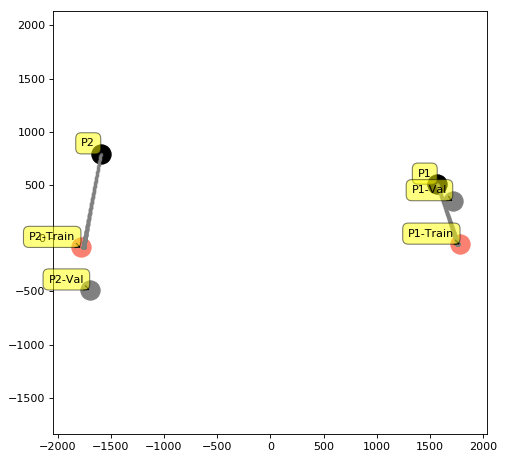

Best P1 Val 2736226.25 	Best P2 Val 2781908.67
P2 Done


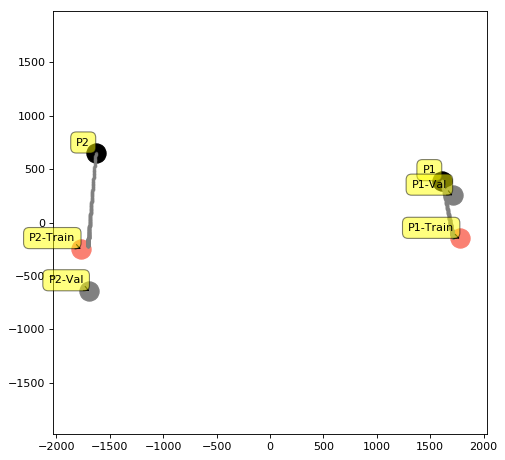

Best P1 Val 2736079.31 	Best P2 Val 2788524.66
P2 Done


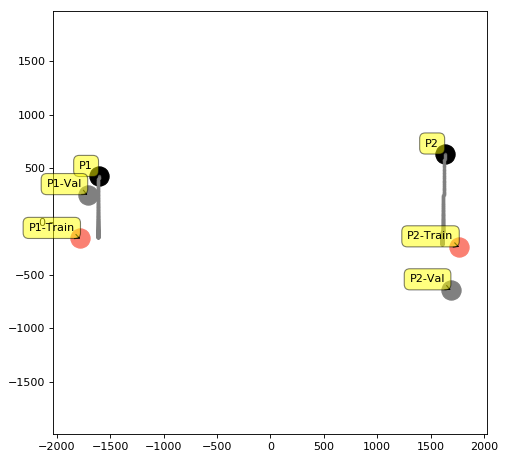

Best P1 Val 2738769.15 	Best P2 Val 2791541.02


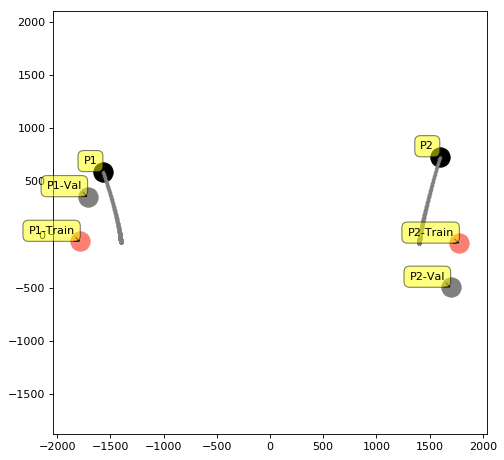

Best P1 Val 2761398.69 	Best P2 Val 2823822.35
P2 Done


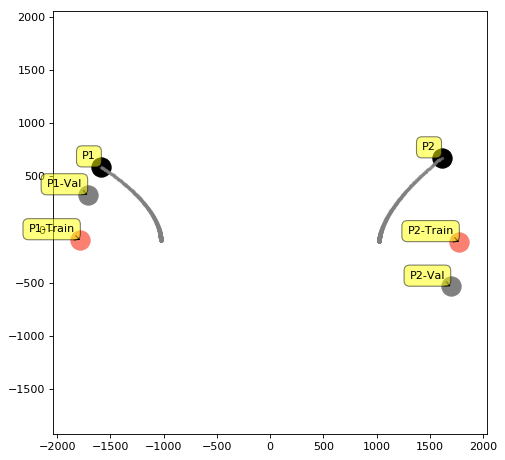

Best P1 Val 2840879.23 	Best P2 Val 3005920.60


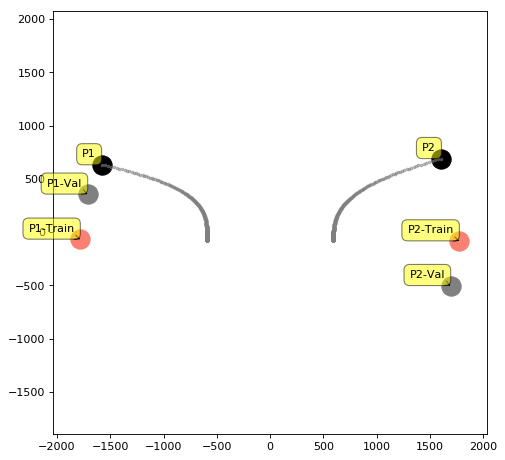

Best P1 Val 2921673.80 	Best P2 Val 3390136.39


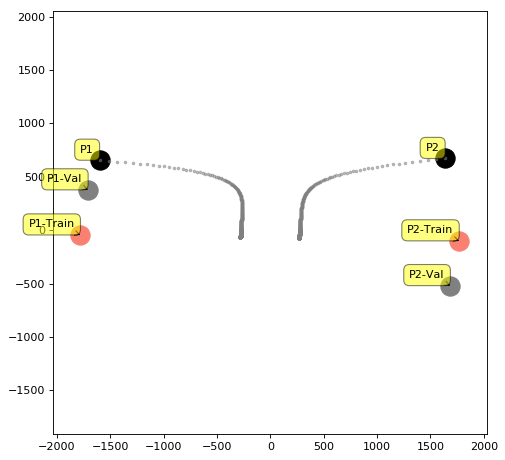

Best P1 Val 2948092.71 	Best P2 Val 3539830.18


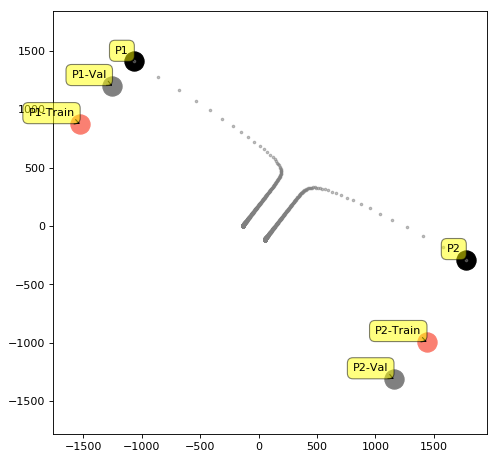

Best P1 Val 2962915.30 	Best P2 Val 3563533.09


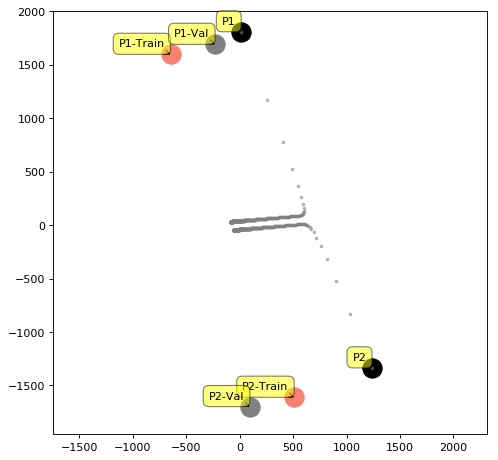

Best P1 Val 3122620.30 	Best P2 Val 3640049.73


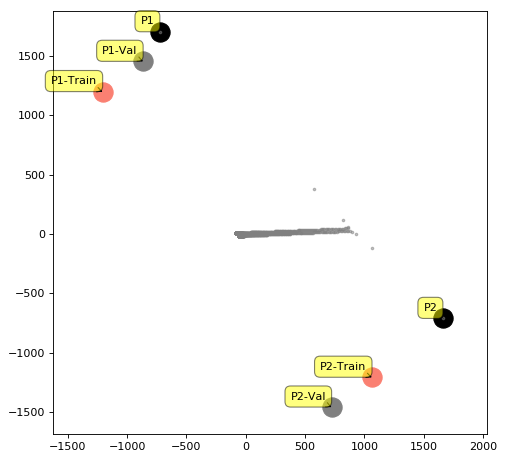

Best P1 Val 4231284.39 	Best P2 Val 3802106.92


In [6]:
%matplotlib inline
# sharing both params
all_shared_best_vals = []
last_P1_train_loss = -1
last_P2_train_loss = -1
for log_coef in np.arange(-5, 5):
    env = Environment(P1, P2, 0.005)
    for time in range(1000):
        coefs = np.ones([num_units]) * np.exp(log_coef)
        P1_train_loss, P1_val_loss, state = env.update_P1(coefs)
        P2_train_loss, P2_val_loss, state = env.update_P2(coefs)
        
        if np.abs(P1_train_loss - last_P1_train_loss) < 1e-3:
            print("P1 Done")
            break
        if np.abs(P2_train_loss - last_P2_train_loss) < 1e-3:
            print("P2 Done")
            break
        last_P1_train_loss = P1_train_loss
        last_P2_train_loss = P2_train_loss
    
    # print("Final Val Loss \tP1: %.2f \tP2: %.2f" % (P1_val_loss, P2_val_loss))
    all_shared_best_vals.append(env.best_P2_valid_loss)
    env.visualize()

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


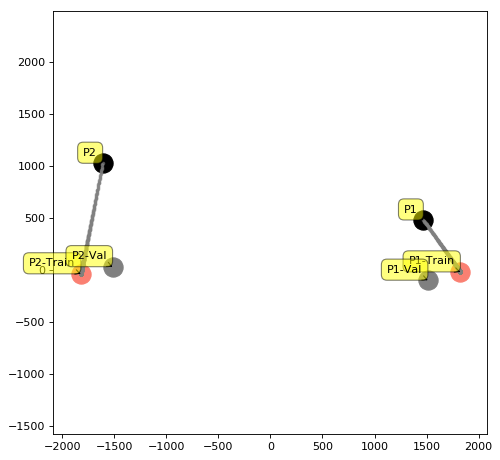

Best P1 Val 2864917.23 	Best P2 Val 2852263.90


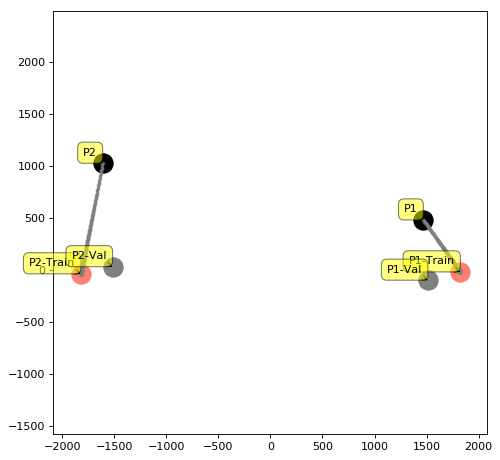

Best P1 Val 2864581.66 	Best P2 Val 2852235.09


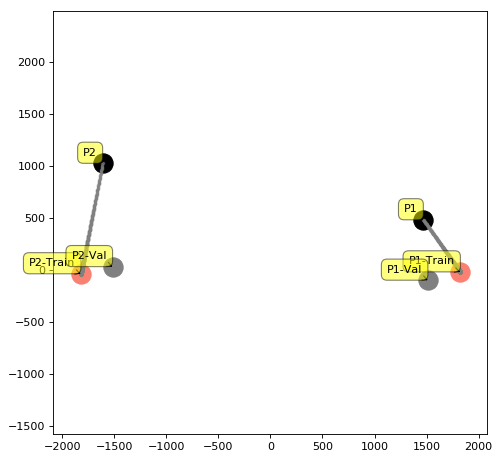

Best P1 Val 2863997.07 	Best P2 Val 2851590.39


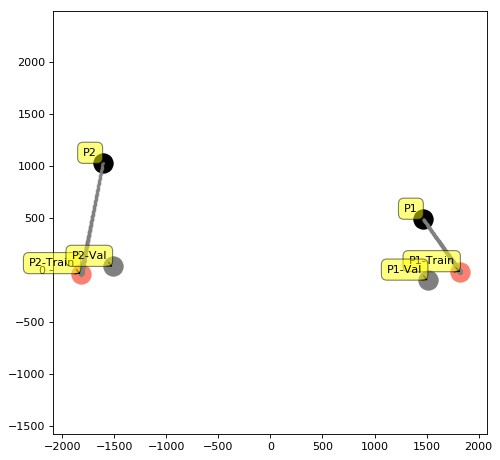

Best P1 Val 2861591.28 	Best P2 Val 2849101.43


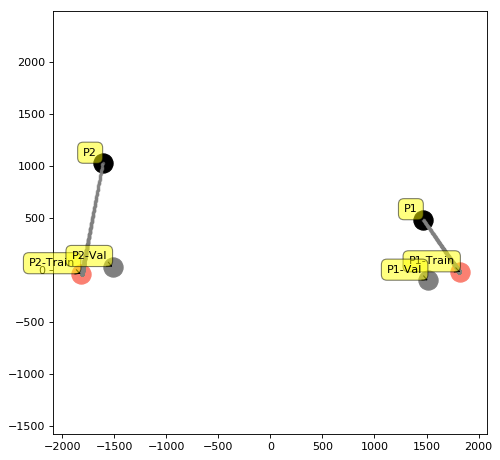

Best P1 Val 2855968.06 	Best P2 Val 2844915.51


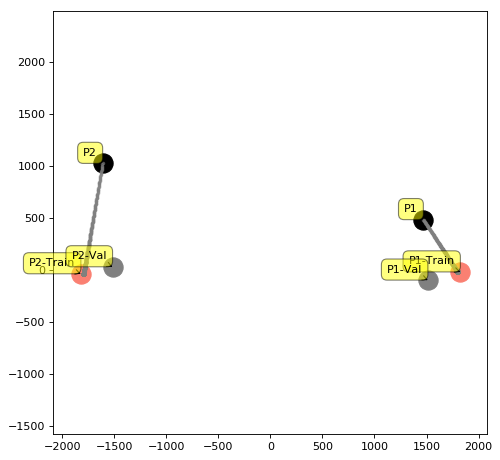

Best P1 Val 2843491.16 	Best P2 Val 2833181.77


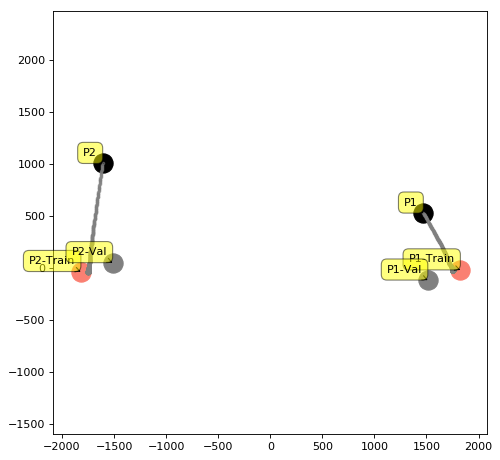

Best P1 Val 2815366.34 	Best P2 Val 2801423.73


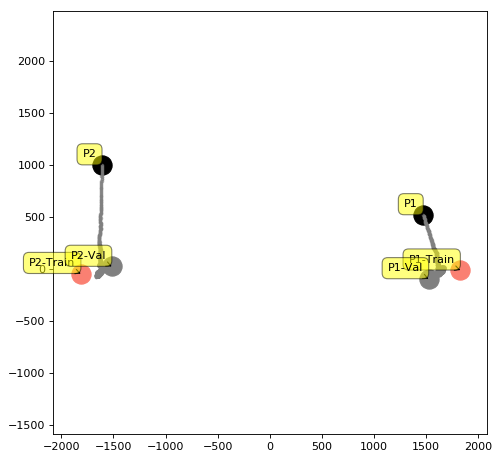

Best P1 Val 2728988.40 	Best P2 Val 2728233.09


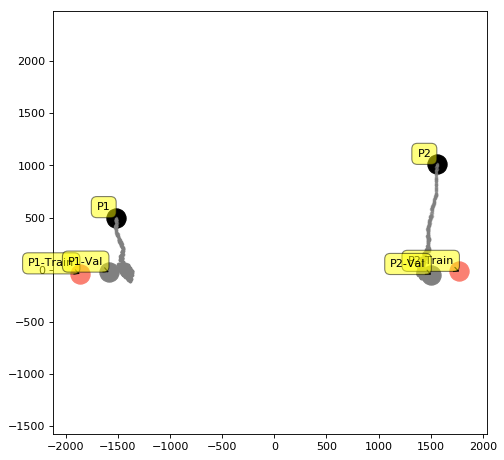

Best P1 Val 2597634.53 	Best P2 Val 2615256.17


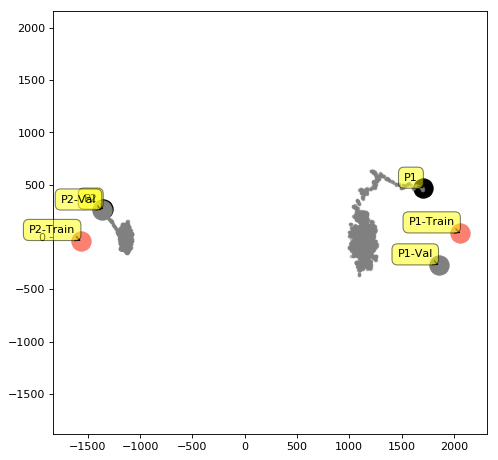

Best P1 Val 2581649.53 	Best P2 Val 2568431.66


In [191]:
%matplotlib inline
from multitask.selector import MultiArmedBanditSelector
selector = MultiArmedBanditSelector(
    num_actions=num_units, Q_initial=-5)
# initial task
task, _ = selector.sample()

selector_best_vals = []
last_P1_train_loss = -1
last_P2_train_loss = -1
for log_coef in np.arange(-5, 5):
    env = Environment(P1, P2, 0.005)
    for step in range(3000):
        coefs = (np.eye(num_units) * np.exp(log_coef))[task]
        
        P1_train_loss, P1_val_loss, state = env.update_P1(coefs)
        P2_train_loss, P2_val_loss, state = env.update_P2(coefs)
        
        if np.abs(P1_train_loss - last_P1_train_loss) < 1e-3:
            print("P1 Done")
            break
        # if np.abs(P2_train_loss - last_P2_train_loss) < 1e-3:
        #     print("P2 Done")
        #     break
        last_P1_train_loss = P1_train_loss
        last_P2_train_loss = P2_train_loss
        
        selector.update_Q_values(new_Q_value=-P1_val_loss/50000., index=task)
        
        
        task, _ = selector.sample(step=step)
    
    # print("Final Val Loss \tP1: %.2f \tP2: %.2f" % (P1_val_loss, P2_val_loss))
    env.visualize()
    selector_best_vals.append(env.best_P1_valid_loss)

In [192]:
selector._Q_values

[Q_Entry(Value=-57.768156783453925, Count=203),
 Q_Entry(Value=-57.563802901108595, Count=218),
 Q_Entry(Value=-57.64388458833646, Count=235),
 Q_Entry(Value=-57.4184692823126, Count=225),
 Q_Entry(Value=-57.434968435843714, Count=249),
 Q_Entry(Value=-57.17446812940016, Count=236),
 Q_Entry(Value=-57.388384714679, Count=288),
 Q_Entry(Value=-57.63996281799298, Count=268),
 Q_Entry(Value=-57.539934554095005, Count=237),
 Q_Entry(Value=-57.54627099595901, Count=237),
 Q_Entry(Value=-57.34246234554226, Count=204),
 Q_Entry(Value=-57.439619001065786, Count=261),
 Q_Entry(Value=-57.322476680083554, Count=306),
 Q_Entry(Value=-57.587316176774124, Count=189),
 Q_Entry(Value=-57.52108755784493, Count=219),
 Q_Entry(Value=-57.464078505736715, Count=228),
 Q_Entry(Value=-57.61848715687593, Count=221),
 Q_Entry(Value=-57.81802694302526, Count=206),
 Q_Entry(Value=-57.5960360451981, Count=214),
 Q_Entry(Value=-57.83210708500212, Count=253),
 Q_Entry(Value=-57.77320148100019, Count=226),
 Q_Entry(

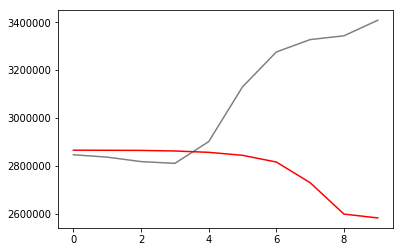

In [193]:
plt.plot(all_shared_best_vals, "grey")
plt.plot(selector_best_vals, c="red")

In [1]:
%matplotlib inline
import copy
import numpy as np
from test_utils.utils import *
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from multitask.ddpg import SingleEpisodeDDPGController

num_units = 32
num_actions = 3

T1 = np.random.normal(loc=np.ones([num_actions, num_units]) * 150, scale=5)
T2 = np.random.normal(loc=np.ones([num_actions, num_units]) * -150, scale=5)
T1_train = np.random.normal(loc=T1, scale=100)
T2_train = np.random.normal(loc=T2, scale=100)
mask = np.tanh(-np.random.normal(size=[num_actions, 1]))

T1_val = np.random.normal(loc=((1-mask) * T1_train + mask * T2_train), scale=10)
T2_val = np.random.normal(loc=(mask * T1_train + (1-mask) * T2_train), scale=10)

P1 = Point(params=T1,
           params_train=T1_train,
           params_val=T1_val)

P2 = Point(params=T2,
           params_train=T2_train,
           params_val=T2_val)

env = Environment(P1, P2, 0.005)

In [2]:
sess = tf.Session()
selector = SingleEpisodeDDPGController(
    sess=sess,
    num_units=num_units * num_actions * 3,  # [A, B, A-B]
    num_actions=num_actions,
    batch_size=4,
    learning_rate=0.05,
    tau=0.5,
    gamma=0.5,
    actor_activation=tf.nn.tanh,
    critic_activation=None,
    opitmizer_name="sgd",
    actor_scope="Actor",
    critic_scope="Critic",
    actor_target_scope="ActorTarget",
    critic_target_scope="CriticTarget")

In [7]:
def state_processing(state):
    # length 3 of [num_actions, num_units]
    # [num_actions, 3 x num_units]
    processed_state = np.concatenate(state, axis=-1)
    # [1, num_actions x 3 x num_units]
    processed_state = np.reshape(processed_state, [1, -1])
    return processed_state
def action_processing(action):
    # [batch, num_actions] where batch=1
    # to [num_actions, 1]
    action = np.squeeze(action)
    action = np.expand_dims(action, axis=-1)
    return action


initial_state = state_processing(env.state())
display(initial_state.shape)
action = selector.act(initial_state)
action = action_processing(coefs)
display(action)

(1, 288)

array([[ 0.48714278],
       [-0.60475824],
       [ 0.65660947]])

In [8]:
selector_best_vals = []
last_P1_train_loss = -1
last_P2_train_loss = -1
for step in range(3000):
    print(step)
    coefs = action_processing(action)
    P1_train_loss, P1_val_loss, _ = env.update_P1(coefs)
    P2_train_loss, P2_val_loss, _ = env.update_P2(coefs)

    if np.abs(P1_train_loss - last_P1_train_loss) < 1e-3:
        print("P1 Done")
        break
    # if np.abs(P2_train_loss - last_P2_train_loss) < 1e-3:
    #     print("P2 Done")
    #     break
    last_P1_train_loss = P1_train_loss
    last_P2_train_loss = P2_train_loss

    action, debug = selector.update(
        new_state=state_processing(env.state()),
        observed_reward=-P1_val_loss/50000.)

0
1
2
Experience(State=array([[144.29300962, 152.43971737, 152.55421831, ..., 292.96931615,
        293.9988788 , 301.74352696],
       [143.69399339, 148.76067876, 147.53071438, ..., 289.63926447,
        288.18666347, 294.3271903 ],
       [142.9036478 , 144.97263456, 142.45123954, ..., 286.19288868,
        282.37159896, 286.97430231],
       [143.99055246, 150.58683376, 150.02218477, ..., 291.28524839,
        291.05954847, 297.9928888 ]]), Action=array([[ 0.4917191 , -0.60492945,  0.60946417],
       [ 0.4917191 , -0.60492945,  0.60946417],
       [ 0.4917191 , -0.60492945,  0.60946417],
       [ 0.4917191 , -0.60492945,  0.60946417]], dtype=float32), Reward=array([-48.28226404, -49.0788808 , -49.91470144, -48.67189678]), NextState=array([[143.99055246, 150.58683376, 150.02218477, ..., 291.28524839,
        291.05954847, 297.9928888 ],
       [143.30905075, 146.86655827, 144.98403286, ..., 287.90801224,
        285.25714101, 290.61997992],
       [142.63842469, 143.23839276, 140.0

/Users/AlexGuo/Documents/Documents/UNC/DLResearches/RamTextSummCNNDM/multitask/ddpg.py:134: UserWarning: This Code Assumes No Termination of Episodes
  warnings.warn("This Code Assumes No Termination of Episodes")


Experience(State=array([[142.9036478 , 144.97263456, 142.45123954, ..., 286.19288868,
        282.37159896, 286.97430231],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [142.63842469, 143.23839276, 140.09157698, ..., 284.64627289,
        279.67956589, 283.54229402]]), Action=array([[ 0.4917191 , -0.60492945,  0.60946417],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [ 0.32130703, -0.5190028 ,  0.49537176]], dtype=float32), Reward=array([-49.91470144,          nan,          nan, -50.17319347]), NextState=array([[142.63842469, 143.23839276, 140.09157698, ..., 284.64627289,
        279.67956589, 283.54229402],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          na

       [nan, nan, nan, ..., nan, nan, nan]]))
76
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
77
Experience(State=array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [143.00308333, 142.14716656, 138.3836062 , ..., 283.83174703,
        277.731744  , 280.88285244],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
     

117
Experience(State=array([[145.99357917, 139.45946566, 133.3025842 , ..., 298.83766436,
        287.83158216, 288.42751087],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]]), Action=array([[ 1.,  1., -1.],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([-48.05399443,          nan,          nan,          nan]), NextState=array([[144.32655956, 136.47584205, 129.80743237, ..., 306.35876526,
        294.00563028, 293.99589327],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          na

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
156
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
194
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
234
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
273
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
313
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
353
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [147.72779957, 142.5314147 , 136.90196173, ..., 291.0710442 ,
        281.41164453, 282.6058742 ]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [ 1.,  1., -1.]], dtype=float32), Reward=array([         nan,          nan,          nan, -48.67503126]), NextState=array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [145.99357917, 139.45946566, 1

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
432
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
472
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
511
Experience(State=array([[142.9036478 , 144.97263456, 142.45123954, ..., 286.19288868,
        282.37159896, 286.97430231],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]]), Action=array([

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
551
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
591
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
627
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
667
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
711
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

752
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
753
Experience(State=array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [142.9036478 , 144.97263456, 142.45123954, ..., 286.19288868,
        282.37159896, 286.97430231],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]]), Action=arr

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
793
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

833
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
834
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
    

872
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
873
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
    

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
913
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
952
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [

991
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
992
Experience(State=array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [143.61456231, 141.31633472, 136.94268115, ..., 283.59376905,
        276.37002452, 278.83182163],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]]), Action=arr

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1032
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1071
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1112
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1151
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1191
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1231
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1270
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1311
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

1350
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1351
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
  

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1388
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1427
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1464
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1501
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1541
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1583
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1625
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

1665
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1666
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
  

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1705
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

       [nan, nan, nan, ..., nan, nan, nan]]))
1746
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1747
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],


Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1785
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

       [nan, nan, nan, ..., nan, nan, nan]]))
1827
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1828
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],


1871
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1872
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
  

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1914
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

1954
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1955
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
  

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
1996
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

       [nan, nan, nan, ..., nan, nan, nan]]))
2034
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2035
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],


Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2076
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2117
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2160
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2198
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

2237
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2238
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
  

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2280
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

2322
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2323
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
  

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2359
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2399
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

2439
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2440
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
  

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2479
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

       [nan, nan, nan, ..., nan, nan, nan]]))
2521
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2522
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],


Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2559
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

2594
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2595
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
  

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2635
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2676
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2717
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]))
2759
Experience(State=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Action=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32), Reward=array([nan, nan, nan, nan]), NextState=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       

KeyboardInterrupt: 

In [ ]:

# initial task



for log_coef in np.arange(-5, 5):
    env = Environment(P1, P2, 0.005)
    
    
    # print("Final Val Loss \tP1: %.2f \tP2: %.2f" % (P1_val_loss, P2_val_loss))
    env.visualize()
    selector_best_vals.append(env.best_P1_valid_loss)